In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import datetime 

In [46]:
status = '활동'
deviceNumArray = []
studentRecordDfArr = []

for i in range(0,7):
    studentRecordDf = pd.read_excel("/Users/hyennaeon/Downloads/하틴루_데이터수집_기록표_전원.xlsx", sheet_name=i)
    studentRecordDf = studentRecordDf.loc[studentRecordDf['상태'] == status]
    studentRecordDf = studentRecordDf.reset_index(drop=True)
    deviceNumArray.append((studentRecordDf['기기 번호'][0]))
    studentRecordDfArr.append(studentRecordDf)
startDate = '20230420'
endDate = '20230530'
indexNameArray = ['hr','hr_conv','br','br_conv','mot','r','speed','temperature','humidity','d2']
nameArray = ['하원','효은','민우','명균','지원','정민','채별']

In [47]:
studentDf = pd.DataFrame()

for i in range(0,7):
    Url = 'http://52.231.67.67:3000/api/sensorData/duration?deviceNo='+str(deviceNumArray[i])+'&startDate=' + '20230420' + '&endDate=' + '20230530'
    studentWholeDf = pd.read_json(Url)
    studentWholeDf = studentWholeDf.sort_index(ascending=False)
    studentWholeDf = studentWholeDf.reset_index(drop=True)
    studentWholeDf['regdate'] = pd.to_datetime(studentWholeDf['regdate'])
    studentWholeDf['regdate'] = studentWholeDf['regdate'].dt.strftime("%Y-%m-%d %H:%M")
    for j in range(0, len(studentRecordDfArr[i])):
        startDate = str(pd.to_datetime(studentRecordDfArr[i]['숙면 시작 날짜/시간'][j]))
        endDate = str(pd.to_datetime(studentRecordDfArr[i]['숙면 종료 날짜/시간'][j]))
        mask = (studentWholeDf['regdate'] >= startDate) & (studentWholeDf['regdate'] <= endDate) 
        Df = studentWholeDf[mask]
        Df = Df.loc[Df['hr'] != 0]
        Df['userId'] = i
        studentDf = pd.concat([studentDf, Df])
    print(len(studentDf))
studentDf.to_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/SecondDeepSleepData_AllStudent.csv")


453
873
1305
1685
2022
2548
2951


findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from curr

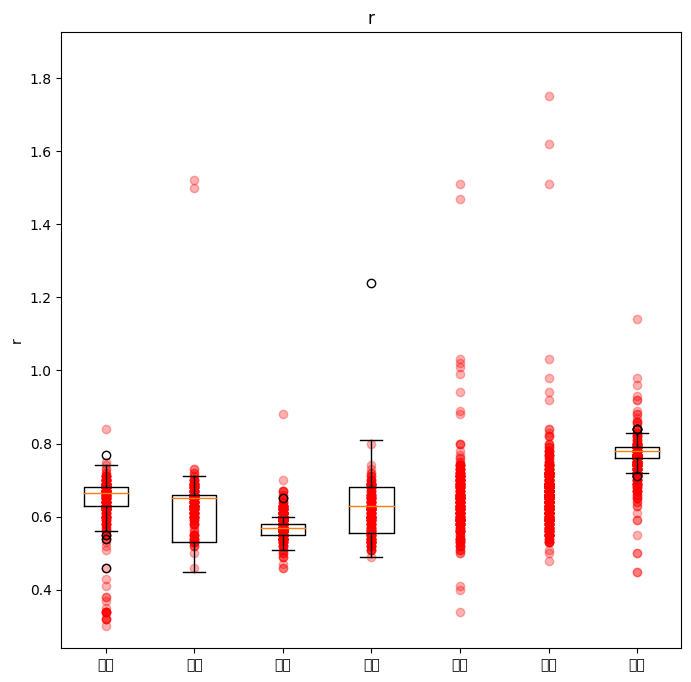

In [48]:
#보고싶은 열 이름 지정 
colName = 'r'

position = [1,2,3,4,5,6,7]
plt.figure(figsize=(8, 8))
ylim = [studentDf[colName].min()*0.8, studentDf[colName].max()*1.1]


sleepColArray = []
notSleepColArray = []
plt.title(colName)
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    Df.reset_index(drop=True)
    Df_sleep = Df[Df['status']==4]
    Df_notsleep = Df[Df['status']!=4]
    sleepColArray.append(Df_sleep[colName])
    notSleepColArray.append(Df_notsleep[colName])
plt.boxplot(sleepColArray,positions=position)
for i in range(1,8):
    plt.scatter([i]*len(notSleepColArray[i-1]),notSleepColArray[i-1],color='red',alpha=0.3)
plt.ylim(ylim)
plt.ylabel(colName)
plt.xticks([1,2,3,4,5,6,7],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6]])

plt.show()

findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

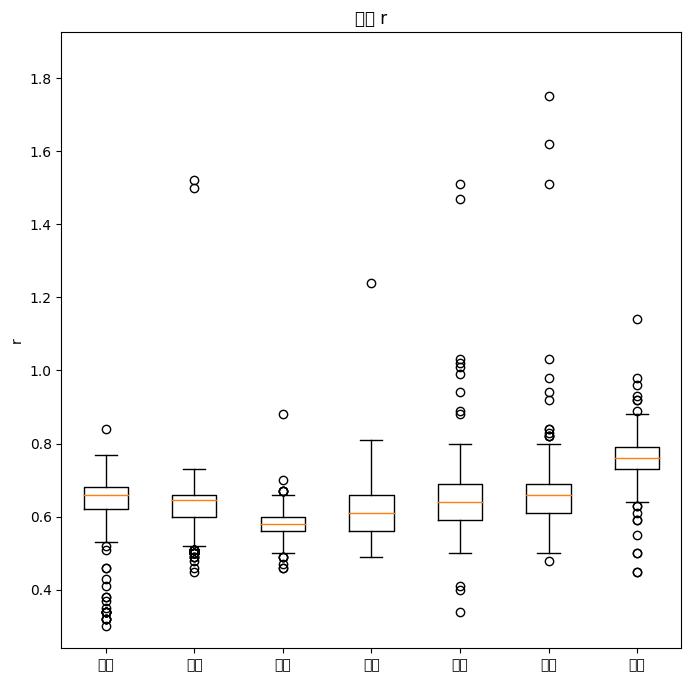

In [53]:
#보고싶은 열 이름 지정 
colName = 'r'

position = [1,2,3,4,5,6,7]
plt.figure(figsize=(8, 8))
ylim = [studentDf[colName].min()*0.8, studentDf[colName].max()*1.1]


colArray = []
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    colArray.append(Df[colName])
plt.boxplot(colArray)
plt.ylim(ylim)
plt.ylabel(colName)
plt.title(status+" "+colName)
plt.xticks([1,2,3,4,5,6,7],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6]])

plt.show()

findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.


하원 sleep:  0.42 % notSleep: 0.58 % status2:  0.03 % status3:  0.55 %
효은 sleep:  0.47 % notSleep: 0.53 % status2:  0.03 % status3:  0.5 %
민우 sleep:  0.09 % notSleep: 0.91 % status2:  0.01 % status3:  0.89 %
명균 sleep:  0.38 % notSleep: 0.62 % status2:  0.01 % status3:  0.61 %
지원 sleep:  0.0 % notSleep: 1.0 % status2:  0.09 % status3:  0.89 %
정민 sleep:  0.0 % notSleep: 1.0 % status2:  0.1 % status3:  0.9 %
채별 sleep:  0.27 % notSleep: 0.73 % status2:  0.11 % status3:  0.61 %


findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Nanum Gothic' not found.
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51008

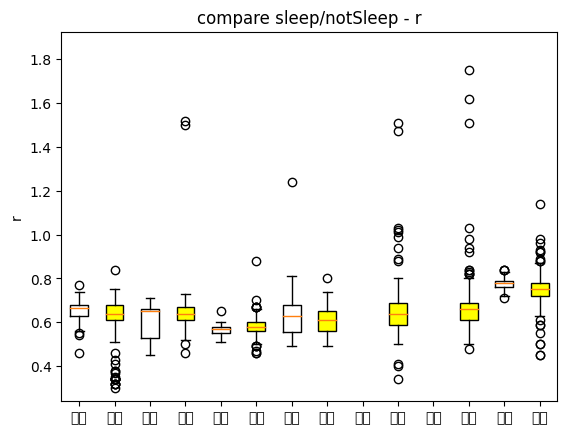

In [54]:
#보고싶은 열 이름 지정 
colName = 'r'

position = [1,3,5,7,9,11,13]
position2 = [2,4,6,8,10,12,14]
ylim = [studentDf[colName].min()*0.8, studentDf[colName].max()*1.1]


sleepColArray = []
notSleepColArray = []
plt.title("compare sleep/notSleep - "+colName)
for i in range(0,7):
    Df = studentDf[studentDf['userId'] == i]
    Df.reset_index(drop=True)
    Df_sleep = Df[Df['status']==4]
    Df_notsleep = Df[Df['status']!=4]
    sleepColArray.append(Df_sleep[colName])
    notSleepColArray.append(Df_notsleep[colName])
    print(nameArray[i],"sleep: ",round(len(Df_sleep)/len(Df),2),"%","notSleep:",round(len(Df_notsleep)/len(Df),2) ,"%","status2: ",round(len(Df[Df['status']==2])/len(Df),2),"%","status3: ",round(len(Df[Df['status']==3])/len(Df),2),"%")
plt.boxplot(sleepColArray,positions=position)
plt.ylim(ylim)
plt.ylabel(colName)

boxplot = plt.boxplot(notSleepColArray,positions = position2, patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor='yellow')

plt.xticks(position + position2, labels=[nameArray[0], nameArray[1], nameArray[2], nameArray[3], nameArray[4], nameArray[5], nameArray[6],
                                          nameArray[0], nameArray[1], nameArray[2], nameArray[3], nameArray[4], nameArray[5], nameArray[6]])

plt.show()